# Servicios Web y APIs 

## Índice
1. [API Air Quality](#air)
2. [API de OpenWeather](#wea)
3. [API de la NASA](#nasa)
4. [Yahoo Finance](#yah)

En este Notebook vamos a llamar a diversas APIs. Antes de comenzar, es importante destacar dos conceptos:  

1) **Codificación de URLs**: Toda cadena de cadena de caracteres que se introduzca en una URL tiene que codificarse adecuadamente. En Python, podemos utilizar la función `quote()` del paquete `urllib.parse`

In [1]:
import urllib.parse
urllib.parse.quote(' ')
urllib.parse.quote('ñ')

'%C3%B1'

2) **Peticiones HTTP**: la librería `requests` es la más utilizada para realizar peticiones HTTP en Python, permitiendo utilizar los métodos más comunes de este protocolo (GET, POST, PUT, etc.). Para más información entra en este [enlace](https://realpython.com/python-requests/)

También podemos utilizar la librería `urllib.request`

<a id="air"></a>
## API Air Quality

Esta API abierta proporciona información acerca de la calidad del aire en diversas ciudades. La lista de APIS se encuentra en https://api.openaq.org/  

En primer lugar vamos a llamar a la API **cities**, la cual nos informa de las ciudades disponibles

In [2]:
import urllib.request
import json

endpoint = 'https://api.openaq.org/v2/cities'

pais = input('Introduzca las siglas del país (por ejemplo ES): ')

url = endpoint + '?country=' + pais

print(url)

datos = urllib.request.urlopen(url).read().decode()

js = json.loads(datos)

for item in js['results']:
    print(item['city'])

Introduzca las siglas del país (por ejemplo ES): es
https://api.openaq.org/v2/cities?country=es
A Coruña
Albacete
Alicante/Alacant
Almeria
Almería
Araba/Álava
Asturias
Ávila
Badajoz
Barcelona
Bizkaia
Burgos
Cáceres
Cádiz
Cantabria
Carboneras
Castellón/Castelló
CCAA Catalu�a
CCAA Com. Valenciana
CCAA Galicia
CCAA Pa�s Vasco
Ciudad Real
Córdoba
Cuenca
Gipuzkoa
Girona
Granada
Guadalajara
Huelva
Huesca
Illes Balears
Jaén
La Rioja
Las Palmas
León
Lleida
Lugo
Madrid
Malaga
Málaga
Marbella
Murcia
Navarra
Niebla
Ourense
Palencia
Pontevedra
Salamanca
Santa Cruz de Tenerife
Segovia
Sevilla
Soria
Tarragona
Teruel
Toledo
Valencia/València
Valladolid
Villanueva Del Arzobispo
Zamora
Zaragoza


Esto mismo podemos realizarlo con la librería `requests`, instalándola previamente.  
Esta librería también me permite utilizar el método POST de HTTP: `requests.post(...)`

In [3]:
import requests

endpoint = 'https://api.openaq.org/v2/cities'

pais = input('Introduzca las siglas del país (por ejemplo ES): ')

datos = requests.get(endpoint, params={'country':pais})

js = datos.json()

for item in js['results']:
    print(item['city'])

Introduzca las siglas del país (por ejemplo ES): es
A Coruña
Albacete
Alicante/Alacant
Almeria
Almería
Araba/Álava
Asturias
Ávila
Badajoz
Barcelona
Bizkaia
Burgos
Cáceres
Cádiz
Cantabria
Carboneras
Castellón/Castelló
CCAA Catalu�a
CCAA Com. Valenciana
CCAA Galicia
CCAA Pa�s Vasco
Ciudad Real
Córdoba
Cuenca
Gipuzkoa
Girona
Granada
Guadalajara
Huelva
Huesca
Illes Balears
Jaén
La Rioja
Las Palmas
León
Lleida
Lugo
Madrid
Malaga
Málaga
Marbella
Murcia
Navarra
Niebla
Ourense
Palencia
Pontevedra
Salamanca
Santa Cruz de Tenerife
Segovia
Sevilla
Soria
Tarragona
Teruel
Toledo
Valencia/València
Valladolid
Villanueva Del Arzobispo
Zamora
Zaragoza


A continuación, llamamos a la API **latest**, que devuelve los últimos registros de una ciudad o país en concreto

In [4]:
endpoint = 'https://api.openaq.org/v2/latest'

ciudad = input('Introduzca el nombre de la ciudad: ')

url = endpoint + '?limit=1&city=' + urllib.parse.quote(ciudad)
print(url)
datos = urllib.request.urlopen(url).read().decode()

js = json.loads(datos)


Introduzca el nombre de la ciudad: madrid
https://api.openaq.org/v2/latest?limit=1&city=madrid


Parseamos el JSON de respuesta para obtener todos los niveles disponibles y la fecha de las mediciones

In [5]:
print(js)

{'meta': {'name': 'openaq-api', 'license': 'CC BY 4.0d', 'website': 'api.openaq.org', 'page': 1, 'limit': 1, 'found': 0}, 'results': []}


In [ ]:
for item in js['results'][0]['measurements']:
    print('El valor de',item['parameter'], 'en', ciudad, 'a',item['lastUpdated'],
         'es de', item['value'], item['unit'])

<a id="wea"></a>
## API de OpenWeather

Esta API permite obtener información climática. Puedes encontrar la documentación en https://openweathermap.org/api.   
Para obtener la API key hay que registrar un email válido, al cual será enviada la clave.  

Vamos a obtener la predicción de velocidad del viento para una ciudad a través de [esta API](https://openweathermap.org/forecast5)

In [6]:
import urllib.request
import json

api_key = '3886d5996f84c5b9a5c953b027fc2306'
ciudad =input('Introduzca una ciudad y codigo de pais separados por coma: ')
url = 'https://api.openweathermap.org/data/2.5/forecast?q='+ciudad+'&appid='+api_key
print(url)

datos = urllib.request.urlopen(url).read().decode()

js = json.loads(datos)

ts = []

speed = []

for item in js['list']:
    ts.append(item['dt_txt'])
    speed.append(item['wind']['speed'])

len(ts),len(speed)

Introduzca una ciudad y codigo de pais separados por coma: santander,es
https://api.openweathermap.org/data/2.5/forecast?q=santander,es&appid=3886d5996f84c5b9a5c953b027fc2306


(40, 40)

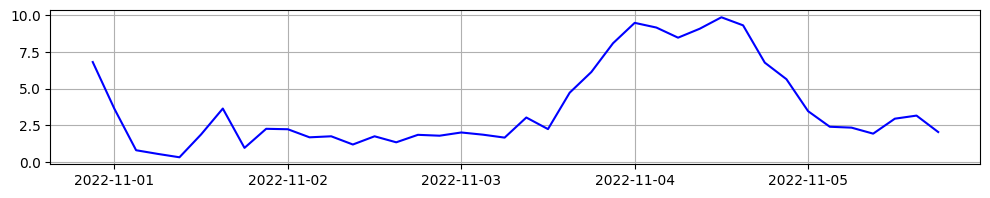

In [7]:
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
 
ts2 = [datetime.strptime(d,'%Y-%m-%d %H:%M:%S') for d in ts]
fig = plt.figure(figsize=(12,2))
plt.grid()

plt.plot(ts2,speed,color='blue');

<a id="nasa"></a>
## API de la NASA
[Documentación](https://api.nasa.gov/)  
Vamos a obtener fotos de marte a través de la API "Mars Rover Photos" del día 01/09/2022

In [13]:
endpoint = 'https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos'

res = requests.get(endpoint, params={'earth_date':'2022-09-01',
                                     'api_key':'DEMO_KEY'})#.json()

type(res)

requests.models.Response

In [14]:
print(res.text)

{"photos":[{"id":1024497,"sol":3580,"camera":{"id":20,"name":"FHAZ","rover_id":5,"full_name":"Front Hazard Avoidance Camera"},"img_src":"https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/03580/opgs/edr/fcam/FLB_715310011EDR_F0971170FHAZ00302M_.JPG","earth_date":"2022-09-01","rover":{"id":5,"name":"Curiosity","landing_date":"2012-08-06","launch_date":"2011-11-26","status":"active"}},{"id":1024498,"sol":3580,"camera":{"id":20,"name":"FHAZ","rover_id":5,"full_name":"Front Hazard Avoidance Camera"},"img_src":"https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/03580/opgs/edr/fcam/FRB_715310011EDR_F0971170FHAZ00302M_.JPG","earth_date":"2022-09-01","rover":{"id":5,"name":"Curiosity","landing_date":"2012-08-06","launch_date":"2011-11-26","status":"active"}},{"id":1024499,"sol":3580,"camera":{"id":21,"name":"RHAZ","rover_id":5,"full_name":"Rear Hazard Avoidance Camera"},"img_src":"https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/03580/opg

In [11]:
foto_url = res['photos'][0]['img_src']

print(foto_url)

https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/03580/opgs/edr/fcam/FLB_715310011EDR_F0971170FHAZ00302M_.JPG


In [17]:
from IPython.display import Image
display(Image(url=foto_url))

## <span style="color:red">Do it yourself</span>
¿Dónde está la Estación Espacial Internacional? Utilizando [esta API](https://wheretheiss.at/w/developer), comprueba que se está moviendo

In [18]:
endpoint = 'https://api.wheretheiss.at/v1/satellites/25544/positions'

res = requests.get(endpoint, params={'timestamps':['1436029892'],
                                     'api_key':'DEMO_KEY'})#.json()

type(res)

res2 = requests.get(endpoint, params={'timestamps':['1436029902'],
                                     'api_key':'DEMO_KEY'})#.json()
1436029902

1436029902

In [19]:
print(res.text)

[{"name":"iss","id":25544,"latitude":-24.870147579366,"longitude":17.59950771856,"altitude":407.8263965908,"velocity":27597.931157627,"visibility":"daylight","footprint":4445.0036883392,"timestamp":1436029892,"daynum":2457208.2163426,"solar_lat":22.85465108118,"solar_lon":283.22043315343,"units":"kilometers"}]


In [20]:
print(res2.text)

[{"name":"iss","id":25544,"latitude":-25.344256596171,"longitude":18.04663730318,"altitude":408.02146112959,"velocity":27597.437444347,"visibility":"daylight","footprint":4446.0129259536,"timestamp":1436029902,"daynum":2457208.2164583,"solar_lat":22.854640837166,"solar_lon":283.17877169756,"units":"kilometers"}]


In [22]:
endpoint = 'https://api.wheretheiss.at/v1/satellites/25544'

res_iss = requests.get(endpoint)

res_iss.json()

{'name': 'iss',
 'id': 25544,
 'latitude': 51.017378523352,
 'longitude': 147.53918326295,
 'altitude': 422.52874538721,
 'velocity': 27593.346950838,
 'visibility': 'daylight',
 'footprint': 4520.306272035,
 'timestamp': 1667245338,
 'daynum': 2459884.3210417,
 'solar_lat': -14.294248303817,
 'solar_lon': 240.3292209939,
 'units': 'kilometers'}

In [23]:
import time
posiciones = []

for k in range(20):
    res_iss = requests.get(endpoint)
    posiciones.append(res_iss.json())
    time.sleep(1)

posiciones

[{'name': 'iss',
  'id': 25544,
  'latitude': 49.274111992669,
  'longitude': 157.51690822949,
  'altitude': 422.63092174829,
  'velocity': 27591.515042252,
  'visibility': 'daylight',
  'footprint': 4520.8242629973,
  'timestamp': 1667245445,
  'daynum': 2459884.3222801,
  'solar_lat': -14.294646864223,
  'solar_lon': 239.88337697731,
  'units': 'kilometers'},
 {'name': 'iss',
  'id': 25544,
  'latitude': 49.253513604568,
  'longitude': 157.60634770068,
  'altitude': 422.63095584839,
  'velocity': 27591.498072534,
  'visibility': 'daylight',
  'footprint': 4520.8244358583,
  'timestamp': 1667245446,
  'daynum': 2459884.3222917,
  'solar_lat': -14.294650589038,
  'solar_lon': 239.87921023433,
  'units': 'kilometers'},
 {'name': 'iss',
  'id': 25544,
  'latitude': 49.21208976509,
  'longitude': 157.7849923858,
  'altitude': 422.6309752526,
  'velocity': 27591.46414029,
  'visibility': 'daylight',
  'footprint': 4520.8245342226,
  'timestamp': 1667245448,
  'daynum': 2459884.3223148,
  '

In [24]:
import pandas as pd

df = pd.DataFrame(posiciones)

df

,name,id,latitude,longitude,altitude,velocity,visibility,footprint,timestamp,daynum,solar_lat,solar_lon,units
0,iss,25544,49.274112,157.516908,422.630922,27591.515042,daylight,4520.824263,1667245445,2.459884e+06,-14.294647,239.883377,kilometers
1,iss,25544,49.253514,157.606348,422.630956,27591.498073,daylight,4520.824436,1667245446,2.459884e+06,-14.294651,239.879210,kilometers
2,iss,25544,49.212090,157.784992,422.630975,27591.464140,daylight,4520.824534,1667245448,2.459884e+06,-14.294658,239.870877,kilometers
3,iss,25544,49.191265,157.874197,422.630961,27591.447178,daylight,4520.824460,1667245449,2.459884e+06,-14.294662,239.866710,kilometers
4,iss,25544,49.149387,158.052375,422.630883,27591.413259,daylight,4520.824065,1667245451,2.459884e+06,-14.294669,239.858376,kilometers
5,iss,25544,49.107210,158.230234,422.630740,27591.379350,daylight,4520.823343,1667245453,2.459884e+06,-14.294677,239.850043,kilometers
6,iss,25544,49.086009,158.319044,422.630645,27591.362399,daylight,4520.822859,1667245454,2.459884e+06,-14.294680,239.845876,kilometers
7,iss,25544,49.043383,158.496428,422.630406,27591.328504,daylight,4520.821648,1667245456,2.459884e+06,-14.294688,239.837543,kilometers
8,iss,25544,49.021958,158.585004,422.630262,27591.311560,daylight,4520.820920,1667245457,2.459884e+06,-14.294692,239.833376,kilometers
9,iss,25544,48.978885,158.761909,422.629927,27591.277678,daylight,4520.819222,1667245459,2.459884e+06,-14.294699,239.825042,kilometers


In [25]:
df['date'] = df.timestamp.apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))
df

,name,id,latitude,longitude,altitude,velocity,visibility,footprint,timestamp,daynum,solar_lat,solar_lon,units,date
0,iss,25544,49.274112,157.516908,422.630922,27591.515042,daylight,4520.824263,1667245445,2.459884e+06,-14.294647,239.883377,kilometers,2022-10-31 20:44:05
1,iss,25544,49.253514,157.606348,422.630956,27591.498073,daylight,4520.824436,1667245446,2.459884e+06,-14.294651,239.879210,kilometers,2022-10-31 20:44:06
2,iss,25544,49.212090,157.784992,422.630975,27591.464140,daylight,4520.824534,1667245448,2.459884e+06,-14.294658,239.870877,kilometers,2022-10-31 20:44:08
3,iss,25544,49.191265,157.874197,422.630961,27591.447178,daylight,4520.824460,1667245449,2.459884e+06,-14.294662,239.866710,kilometers,2022-10-31 20:44:09
4,iss,25544,49.149387,158.052375,422.630883,27591.413259,daylight,4520.824065,1667245451,2.459884e+06,-14.294669,239.858376,kilometers,2022-10-31 20:44:11
5,iss,25544,49.107210,158.230234,422.630740,27591.379350,daylight,4520.823343,1667245453,2.459884e+06,-14.294677,239.850043,kilometers,2022-10-31 20:44:13
6,iss,25544,49.086009,158.319044,422.630645,27591.362399,daylight,4520.822859,1667245454,2.459884e+06,-14.294680,239.845876,kilometers,2022-10-31 20:44:14
7,iss,25544,49.043383,158.496428,422.630406,27591.328504,daylight,4520.821648,1667245456,2.459884e+06,-14.294688,239.837543,kilometers,2022-10-31 20:44:16
8,iss,25544,49.021958,158.585004,422.630262,27591.311560,daylight,4520.820920,1667245457,2.459884e+06,-14.294692,239.833376,kilometers,2022-10-31 20:44:17
9,iss,25544,48.978885,158.761909,422.629927,27591.277678,daylight,4520.819222,1667245459,2.459884e+06,-14.294699,239.825042,kilometers,2022-10-31 20:44:19


<a id="yah"></a>
## Yahoo Finance
Muchas veces, usamos APIs a través de librerías de Python. Por ejemplo, la librería `yfinance` permite conectarnos a la API de Yahoo finance. Puedes encontrar la documentación en [este enlace](https://aroussi.com/post/python-yahoo-finance)

In [ ]:
#Tweepy -> Libreria para acceder a la api de Twitter directamente con Python

In [26]:
import yfinance as yf

In [27]:
data = yf.download('AMZN', period='5d',interval='1m')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-10-25 09:30:00,119.650002,120.309998,119.510002,120.089996,120.089996,1671049
2022-10-25 09:31:00,120.120003,120.360001,119.940002,120.322601,120.322601,251364
2022-10-25 09:32:00,120.339996,120.620003,120.227097,120.250000,120.250000,276738
2022-10-25 09:33:00,120.250000,120.250000,119.459999,119.540001,119.540001,413517
2022-10-25 09:34:00,119.541496,119.849998,119.540001,119.599998,119.599998,321854
...,...,...,...,...,...,...
2022-10-31 15:49:00,102.294998,102.356003,102.260902,102.309998,102.309998,188663
2022-10-31 15:50:00,102.309998,102.320000,102.099998,102.209999,102.209999,334918
2022-10-31 15:51:00,102.199997,102.245003,102.139999,102.205002,102.205002,216254


In [28]:
data = yf.download('^GSPC', period='5d',interval='1m')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-10-25 09:30:00,3799.439941,3804.350098,3799.439941,3804.080078,3804.080078,0
2022-10-25 09:31:00,3803.790039,3806.939941,3802.629883,3805.649902,3805.649902,12791899
2022-10-25 09:32:00,3805.439941,3807.330078,3804.719971,3807.260010,3807.260010,12722104
2022-10-25 09:33:00,3807.219971,3809.060059,3805.959961,3807.889893,3807.889893,10879165
2022-10-25 09:34:00,3807.820068,3811.510010,3807.820068,3809.100098,3809.100098,11774539
...,...,...,...,...,...,...
2022-10-31 15:52:00,3872.729980,3876.209961,3872.209961,3875.250000,3875.250000,17154000
2022-10-31 15:53:00,3875.189941,3875.459961,3873.510010,3873.530029,3873.530029,13162000
2022-10-31 15:54:00,3873.469971,3874.090088,3870.510010,3871.780029,3871.780029,23151000
